In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
 


In [31]:


file_path_csv =(r"C:\Users\Work\OneDrive - University of Salford\MLDM Assesement\Online-Retail-Task.csv")



In [32]:
data_csv = pd.read_csv(file_path_csv)



data_csv.head()
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
print(data_csv)

     InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
1498    536544     22080               RIBBON REEL POLKADOTS          1   
1499    536544     22081           RIBBON REEL FLORA + FAUNA          1   
1500    536544     22082          RIBBON REEL STRIPES DESIGN          1   
1501    536544     22083            PAPER CHAIN KIT RETROSPOT         4   
1502    536544     22086      PAPER CHAIN KIT 50'S CHRISTMAS         33   

          InvoiceDate  UnitPrice  CustomerID         Country  
0      12/1/2010 8:26       2.55    

In [34]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1503 non-null   object 
 1   StockCode    1503 non-null   object 
 2   Description  1502 non-null   object 
 3   Quantity     1503 non-null   int64  
 4   InvoiceDate  1503 non-null   object 
 5   UnitPrice    1503 non-null   float64
 6   CustomerID   1442 non-null   float64
 7   Country      1503 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 94.1+ KB


In [35]:
data_csv.describe()

,Quantity,UnitPrice,CustomerID
count,1503.000000,1503.000000,1442.000000
mean,11.556221,3.142455,15636.444521
std,32.243240,5.285137,1852.880855
min,-24.000000,0.000000,12431.000000
25%,1.000000,1.250000,14307.000000
50%,4.000000,2.100000,15525.000000
75%,12.000000,3.750000,17850.000000
max,600.000000,165.000000,18144.000000


In [36]:
# Calculate the percentage of missing values in each column
missing_percentage = (data_csv.isnull().sum() / len(data_csv)) * 100

# Create a DataFrame to display the missing data counts and percentages
missing_data_info = pd.DataFrame({'Missing Values': data_csv.isnull().sum(), 'Percentage': missing_percentage})

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_info = missing_data_info.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_info)


             Missing Values  Percentage
CustomerID               61    4.058550
Description               1    0.066534
InvoiceNo                 0    0.000000
StockCode                 0    0.000000
Quantity                  0    0.000000
InvoiceDate               0    0.000000
UnitPrice                 0    0.000000
Country                   0    0.000000


In [37]:
# Handling Missing Values
data_csv_cleaned = data_csv.dropna(subset=['Description'])

# Remove rows with missing 'CustomerID'
data_csv_cleaned = data_csv_cleaned.dropna(subset=['CustomerID'])

# Confirm the handling of missing values
missing_values_cleaned = data_csv_cleaned.isnull().sum()



In [38]:
# Feature Selection for Clustering
features_for_clustering = data_csv_cleaned[['Quantity', 'UnitPrice', 'Country']]

features_for_clustering

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom
...,...,...,...
1438,20,1.95,United Kingdom
1439,30,1.95,United Kingdom
1440,32,2.95,United Kingdom
1441,-1,2.10,United Kingdom


In [39]:
# Creating a copy of the selected features to avoid SettingWithCopyWarning
features_for_clustering = data_csv_cleaned[['Quantity', 'UnitPrice', 'Country']].copy()


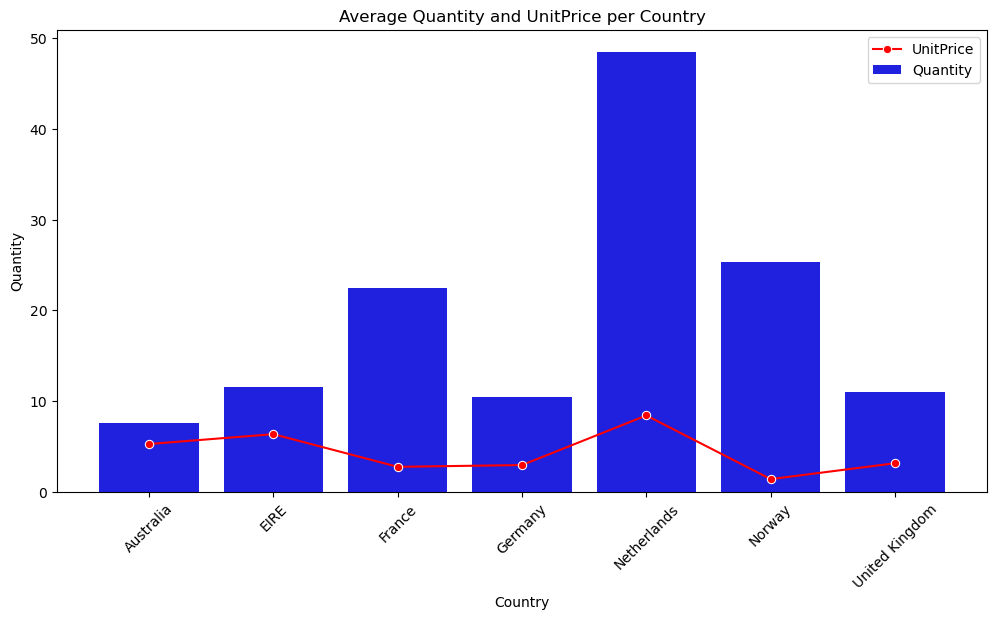

In [40]:
# Grouping the data by 'Country' and calculating mean 'Quantity' and 'UnitPrice'
grouped_data = data_csv_cleaned.groupby('Country').agg({'Quantity': 'mean', 'UnitPrice': 'mean'}).reset_index()

# Creating a bar plot for 'Quantity'
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Quantity', data=grouped_data, color='blue', label='Quantity')

# Adding a line plot for 'UnitPrice'
sns.lineplot(x='Country', y='UnitPrice', data=grouped_data, marker='o', color='red', label='UnitPrice')

# Enhancing the plot
plt.title('Average Quantity and UnitPrice per Country')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [41]:
# Encoding Categorical Variables
# Encode the 'Country' column
label_encoder = LabelEncoder()
features_for_clustering['Country'] = label_encoder.fit_transform(features_for_clustering['Country'])



In [42]:
# Data Transformation
# Normalize 'Quantity' and 'UnitPrice' using StandardScaler
scaler = StandardScaler()
features_for_clustering[['Quantity', 'UnitPrice']] = scaler.fit_transform(features_for_clustering[['Quantity', 'UnitPrice']])

 
features_for_clustering.head()

,Quantity,UnitPrice,Country
0,-0.179506,-0.109403,6
1,-0.179506,0.047075,6
2,-0.118572,-0.072147,6
3,-0.179506,0.047075,6
4,-0.179506,0.047075,6


# K-MEANS CLUSTERING

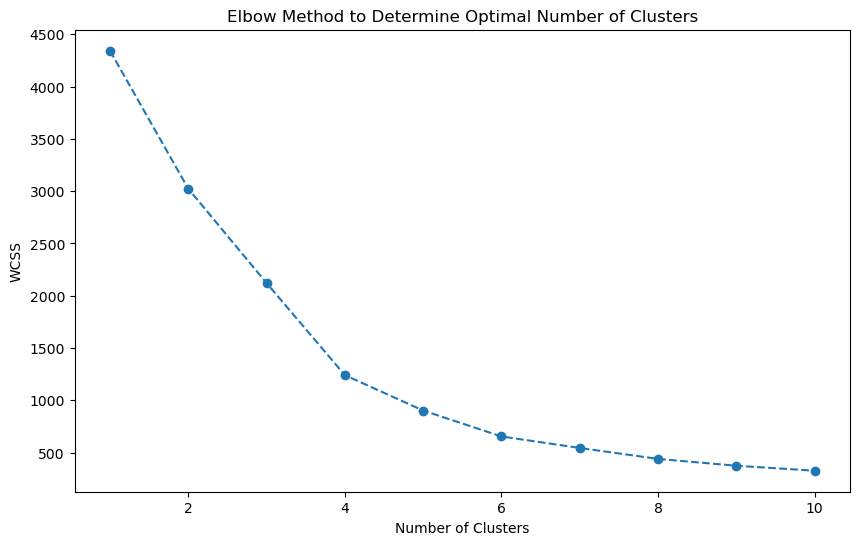

In [43]:
# Applying the Elbow Method to determine the optimal number of clusters
# Calculating the Within-Cluster Sum of Squares (WCSS) for different cluster counts
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.805925568548441
For n_clusters = 3, the average silhouette_score is : 0.7985721205309857
For n_clusters = 4, the average silhouette_score is : 0.8098390602163681
For n_clusters = 5, the average silhouette_score is : 0.7681780100700782
For n_clusters = 6, the average silhouette_score is : 0.5937040668893134
For n_clusters = 7, the average silhouette_score is : 0.5708697708284939
For n_clusters = 8, the average silhouette_score is : 0.5727149772252483
For n_clusters = 9, the average silhouette_score is : 0.5690499522715545
For n_clusters = 10, the average silhouette_score is : 0.5633158996314928


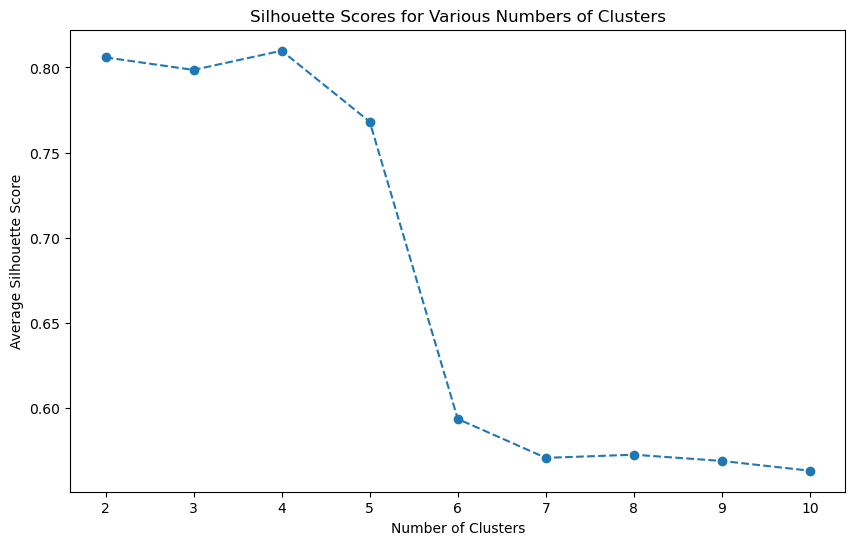

In [44]:
from sklearn.metrics import silhouette_score

# Range of clusters to try
range_n_clusters = list(range(2, 11))

# List to store the average silhouette scores for each k
average_silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(features_for_clustering)
    
    # The silhouette_score gives the average value for al  samples
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    average_silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, average_silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()


In [45]:
from sklearn.cluster import KMeans

# Applying K-Means clustering with 4 clusters
kmeans_optimal = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(features_for_clustering)

data_csv_cleaned['Cluster'] = clusters_optimal

# Analyzing the clusters
cluster_sizes = data_csv_cleaned['Cluster'].value_counts()


cluster_means = data_csv_cleaned.groupby('Cluster').mean(numeric_only=True)


# Print cluster sizes and mean values of features within each cluster
print(cluster_sizes)
print(cluster_means)

Cluster
1    1366
0      70
3       5
2       1
Name: count, dtype: int64
           Quantity   UnitPrice    CustomerID
Cluster                                      
0         13.657143    4.388571  13267.928571
1         10.218887    2.961457  15758.286969
2          1.000000  165.000000  13705.000000
3        446.400000    1.286000  15894.600000


In [46]:
# Define the optimal number of clusters
k_optimal = 4

# Summary statistics for each cluster
for i in range(k_optimal):
    print(f"\nCluster {i} Summary:")
    display(data_csv_cleaned[data_csv_cleaned['Cluster'] == i].describe())


Cluster 0 Summary:


,Quantity,UnitPrice,CustomerID,Cluster
count,70.000000,70.000000,70.000000,70.0
mean,13.657143,4.388571,13267.928571,0.0
std,10.823868,6.640067,1086.074134,0.0
min,1.000000,0.420000,12431.000000,0.0
25%,6.000000,1.300000,12583.000000,0.0
50%,12.000000,2.100000,12662.000000,0.0
75%,24.000000,5.325000,14911.000000,0.0
max,50.000000,50.000000,14911.000000,0.0



Cluster 1 Summary:


,Quantity,UnitPrice,CustomerID,Cluster
count,1366.000000,1366.000000,1366.000000,1366.0
mean,10.218887,2.961457,15758.286969,1.0
std,20.018738,2.981830,1803.777147,0.0
min,-24.000000,0.120000,12433.000000,1.0
25%,1.000000,1.250000,14594.000000,1.0
50%,4.000000,2.100000,15605.000000,1.0
75%,12.000000,3.750000,17850.000000,1.0
max,200.000000,35.750000,18144.000000,1.0



Cluster 2 Summary:


,Quantity,UnitPrice,CustomerID,Cluster
count,1.0,1.0,1.0,1.0
mean,1.0,165.0,13705.0,2.0
std,NaN,NaN,NaN,NaN
min,1.0,165.0,13705.0,2.0
25%,1.0,165.0,13705.0,2.0
50%,1.0,165.0,13705.0,2.0
75%,1.0,165.0,13705.0,2.0
max,1.0,165.0,13705.0,2.0



Cluster 3 Summary:


,Quantity,UnitPrice,CustomerID,Cluster
count,5.000000,5.000000,5.000000,5.0
mean,446.400000,1.286000,15894.600000,3.0
std,112.057128,1.318685,1377.587856,0.0
min,288.000000,0.100000,13694.000000,3.0
25%,432.000000,0.240000,16029.000000,3.0
50%,432.000000,1.250000,16029.000000,3.0
75%,480.000000,1.450000,16210.000000,3.0
max,600.000000,3.390000,17511.000000,3.0


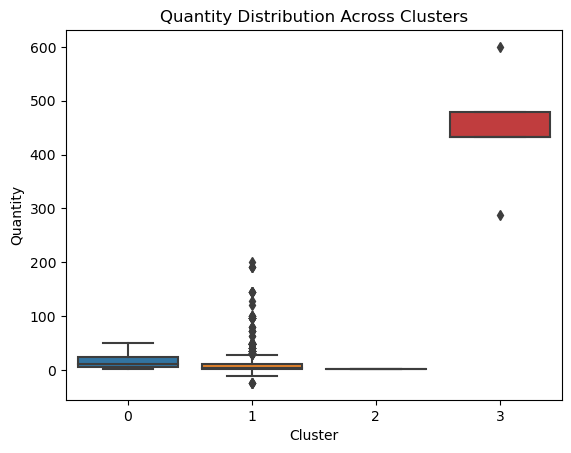

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for feature across clusters
sns.boxplot(x='Cluster', y='Quantity', data=data_csv_cleaned)
plt.title("Quantity Distribution Across Clusters")
plt.show()



In [48]:
# Isolate the outlier cluster
outlier_cluster = data_csv_cleaned[data_csv_cleaned['Cluster'] == 3]


# Analyzing Customer 13705's purchasing behavior
customer_purchases = data_csv_cleaned[data_csv_cleaned['CustomerID'] == 13705]

# Calculating the average cost of purchases for Customer 13705
average_purchase_cost = customer_purchases['UnitPrice'].mean()


print("\nAverage Purchase Cost for Customer 13705: {:.2f}".format(average_purchase_cost))



Average Purchase Cost for Customer 13705: 18.40


In [49]:
 
# Analyzing Customer 13705's purchasing behavior
customer_purchases = data_csv_cleaned[data_csv_cleaned['CustomerID'] == 13705]

 
#Display the outlier transaction(s)
print(outlier_cluster)



    InvoiceNo StockCode                      Description  Quantity  \
181    536387     22466    FAIRY TALE COTTAGE NIGHTLIGHT       432   
182    536387     21731    RED TOADSTOOL LED NIGHT LIGHT       432   
219    536390     20668  DISCO BALL CHRISTMAS DECORATION       288   
730    536437     17021           NAMASTE SWAGAT INCENSE       600   
870    536477     21137         BLACK RECORD COVER FRAME       480   

         InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
181   12/1/2010 9:58       1.45     16029.0  United Kingdom        3  
182   12/1/2010 9:58       1.25     16029.0  United Kingdom        3  
219  12/1/2010 10:19       0.10     17511.0  United Kingdom        3  
730  12/1/2010 12:12       0.24     13694.0  United Kingdom        3  
870  12/1/2010 12:27       3.39     16210.0  United Kingdom        3  


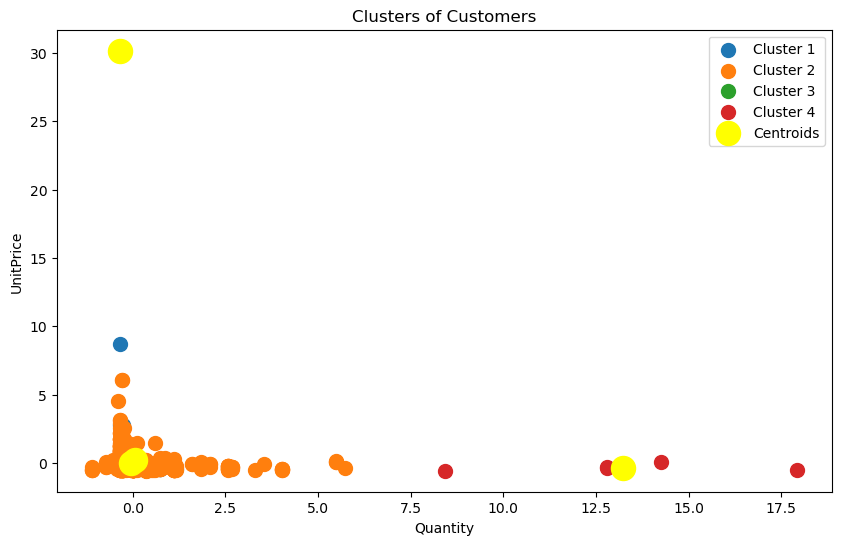

In [50]:
# Apply KMeans with the optimal number of clusters
n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(features_for_clustering)

# Adding cluster labels to the DataFrame
features_for_clustering['Cluster'] = y_kmeans

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    # Adjusting for DataFrame indexing
    cluster_data = features_for_clustering[features_for_clustering['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

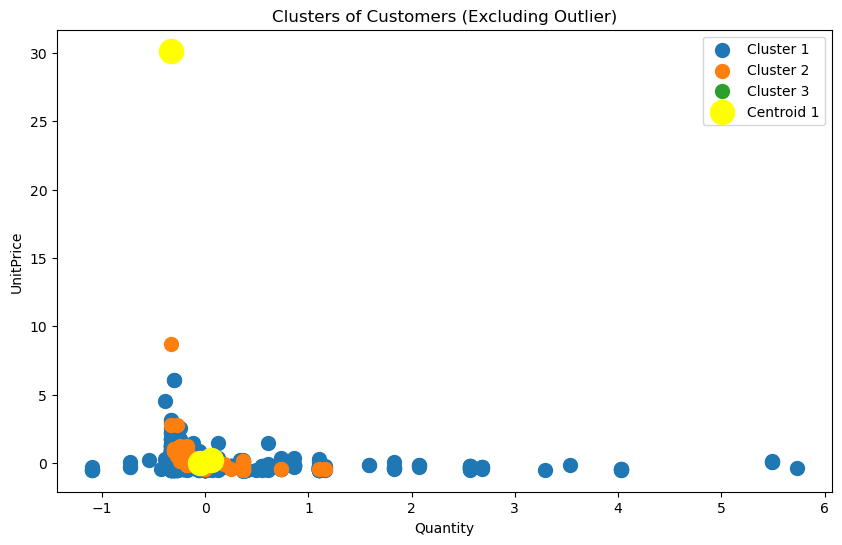

In [51]:
n_clusters = 4   
kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(features_for_clustering)

# Adding cluster labels to the DataFrame
features_for_clustering['Cluster'] = y_kmeans

# Excluding the outlier cluster 
features_for_clustering_no_outlier = features_for_clustering[features_for_clustering['Cluster'] != 3]

# Plotting the clusters, excluding the outlier cluster
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    if i != 3:  # Skipping the outlier cluster
        cluster_data = features_for_clustering_no_outlier[features_for_clustering_no_outlier['Cluster'] == i]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids, excluding the centroid of the outlier cluster
centroids = kmeans.cluster_centers_
for i in range(n_clusters):
    if i != 3:
        plt.scatter(centroids[i, 0], centroids[i, 1], s=300, c='yellow', label=f'Centroid {i+1}' if i == 0 else '')

plt.title('Clusters of Customers (Excluding Outlier)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

# Hierarchical Clustering:

In [52]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

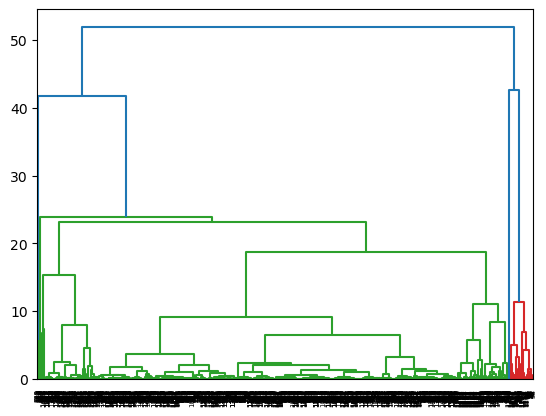

In [53]:
# dendrogram to visualize the hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(features_for_clustering, method='ward'))

C:\Users\Work\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


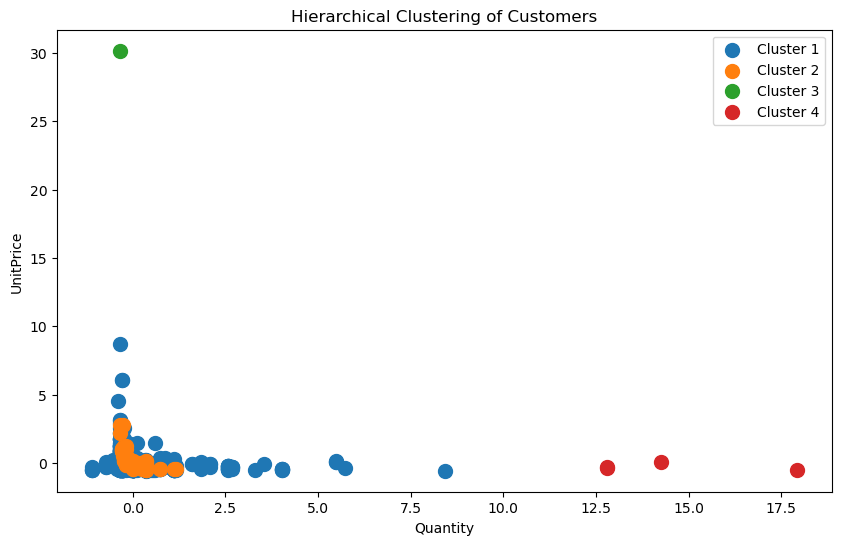

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 4 clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(features_for_clustering)

# Adding hierarchical cluster labels
features_for_clustering['HC_Cluster'] = hc_clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_data = features_for_clustering[features_for_clustering['HC_Cluster'] == i]
    plt.scatter(cluster_data['Quantity'], cluster_data['UnitPrice'], s=100, label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Quantity')  
plt.ylabel('UnitPrice')  
plt.legend()
plt.show()


In [55]:

print(features_for_clustering.head())

   Quantity  UnitPrice  Country  Cluster  HC_Cluster
0 -0.179506  -0.109403        6        0           0
1 -0.179506   0.047075        6        0           0
2 -0.118572  -0.072147        6        0           0
3 -0.179506   0.047075        6        0           0
4 -0.179506   0.047075        6        0           0


In [56]:
# Cluster Characterization:

print("Hierarchical Clustering Summary Statistics:")
for i in range(4):  # Assuming 4 clusters
    print(f"\nCluster {i} Statistics:")
    print(features_for_clustering[features_for_clustering['HC_Cluster'] == i].describe())

    
   

Hierarchical Clustering Summary Statistics:

Cluster 0 Statistics:
          Quantity    UnitPrice      Country      Cluster  HC_Cluster
count  1367.000000  1367.000000  1367.000000  1367.000000      1367.0
mean     -0.044778    -0.028376     5.941478     0.002926         0.0
std       0.651241     0.600860     0.266914     0.085511         0.0
min      -1.093516    -0.565798     1.000000     0.000000         0.0
25%      -0.331841    -0.351572     6.000000     0.000000         0.0
50%      -0.240440    -0.193231     6.000000     0.000000         0.0
75%       0.003296     0.114137     6.000000     0.000000         0.0
max       8.412187     8.729750     6.000000     3.000000         0.0

Cluster 1 Statistics:
        Quantity  UnitPrice    Country    Cluster  HC_Cluster
count  70.000000  70.000000  70.000000  70.000000        70.0
mean    0.053784   0.139950   1.557143   0.985714         1.0
std     0.329771   0.729081   1.085287   0.119523         0.0
min    -0.331841  -0.506187   0.

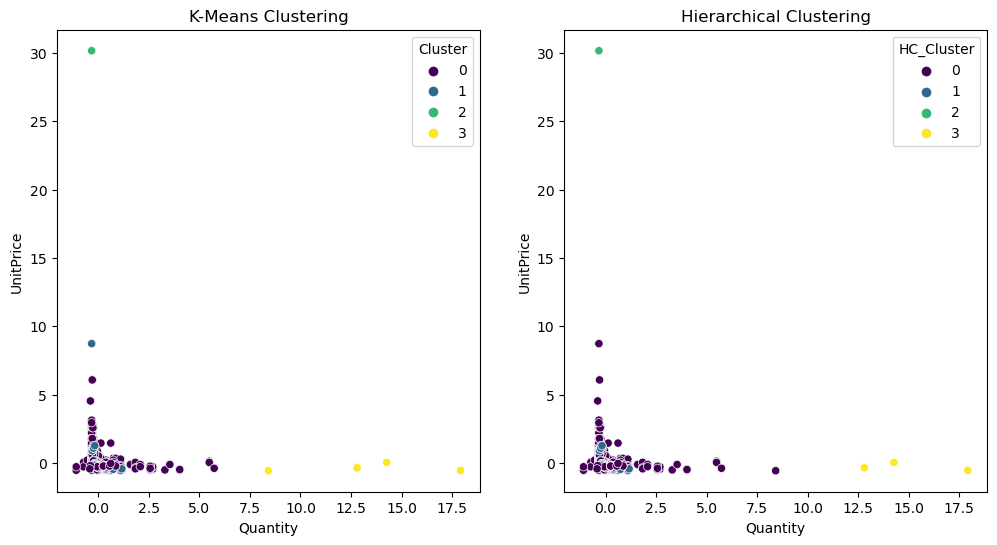

In [57]:
#.Visual Exploration:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting K-Means and Hierarchical Clustering side by side
plt.figure(figsize=(12, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=features_for_clustering, palette='viridis')
plt.title('K-Means Clustering')

# Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='UnitPrice', hue='HC_Cluster', data=features_for_clustering, palette='viridis')
plt.title('Hierarchical Clustering')

plt.show()

#This visualization allows us to visually assess and compare the distribution and separation of clusters obtained from both K-Means and Hierarchical Clustering.